# Verification of NRTidal notebook

Here we show the (mis)matches we obtained with our NRTidal code to check the implementation. Idea is to run the check_NRTidal py script under test, which saves the samples with parameters and match values to a CSV, and then load it and analyze it here.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp

from ripple.waveforms import IMRPhenomD
import matplotlib.pyplot as plt
from ripple import ms_to_Mc_eta
from ripple.constants import MSUN, gt
from jax import grad, vmap
from functools import partial
# import importlib
# import tqdm

%load_ext autoreload
%autoreload 2
from ripple.waveforms import X_NRTidalv2

# To get plot style
import requests
script_url = "https://raw.githubusercontent.com/ThibeauWouters/cheat_sheets/main/myploystyle.py"
exec(requests.get(script_url).text)

jax.config.update("jax_enable_x64", True) # improve precision for comparing waveforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import os
import pandas as pd
os.getcwd()

'/Users/Woute029/Documents/Code/ripple/notebooks'

In [31]:
matches_filename = os.path.join(os.getcwd(), "../test/NRTidal_matches.csv")
print(f"Reading in NRTidal matches from {matches_filename}")
matches_df = pd.read_csv(matches_filename)
matches_df

Reading in NRTidal matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/NRTidal_matches.csv


,Unnamed: 0,m1,m2,chi1,chi2,lambda1,lambda2,match
0,0,1.586176,1.430324,0.0,0.0,3032.851279,3032.851279,0.999294
1,1,2.441424,1.049471,0.0,0.0,1958.273146,1958.273146,0.997631
2,2,1.713002,1.609211,0.0,0.0,4946.907881,4946.907881,0.998654
3,3,2.889265,0.924907,0.0,0.0,2359.849337,2359.849337,0.994362
4,4,2.382713,2.055452,0.0,0.0,138.012114,138.012114,0.999776
...,...,...,...,...,...,...,...,...
995,995,2.373284,1.425325,0.0,0.0,755.599748,755.599748,0.999228
996,996,1.362266,1.299979,0.0,0.0,4935.145081,4935.145081,0.999004
997,997,2.419341,2.302198,0.0,0.0,2087.001022,2087.001022,0.998452
998,998,2.848996,2.003962,0.0,0.0,1800.214362,1800.214362,0.997592


In [32]:
# Get values
total_mass_values = matches_df["m1"] + matches_df["m2"]
lambda_values = matches_df["lambda1"]
match_values= matches_df["match"]
mismatch_values = np.log10(1 - match_values)

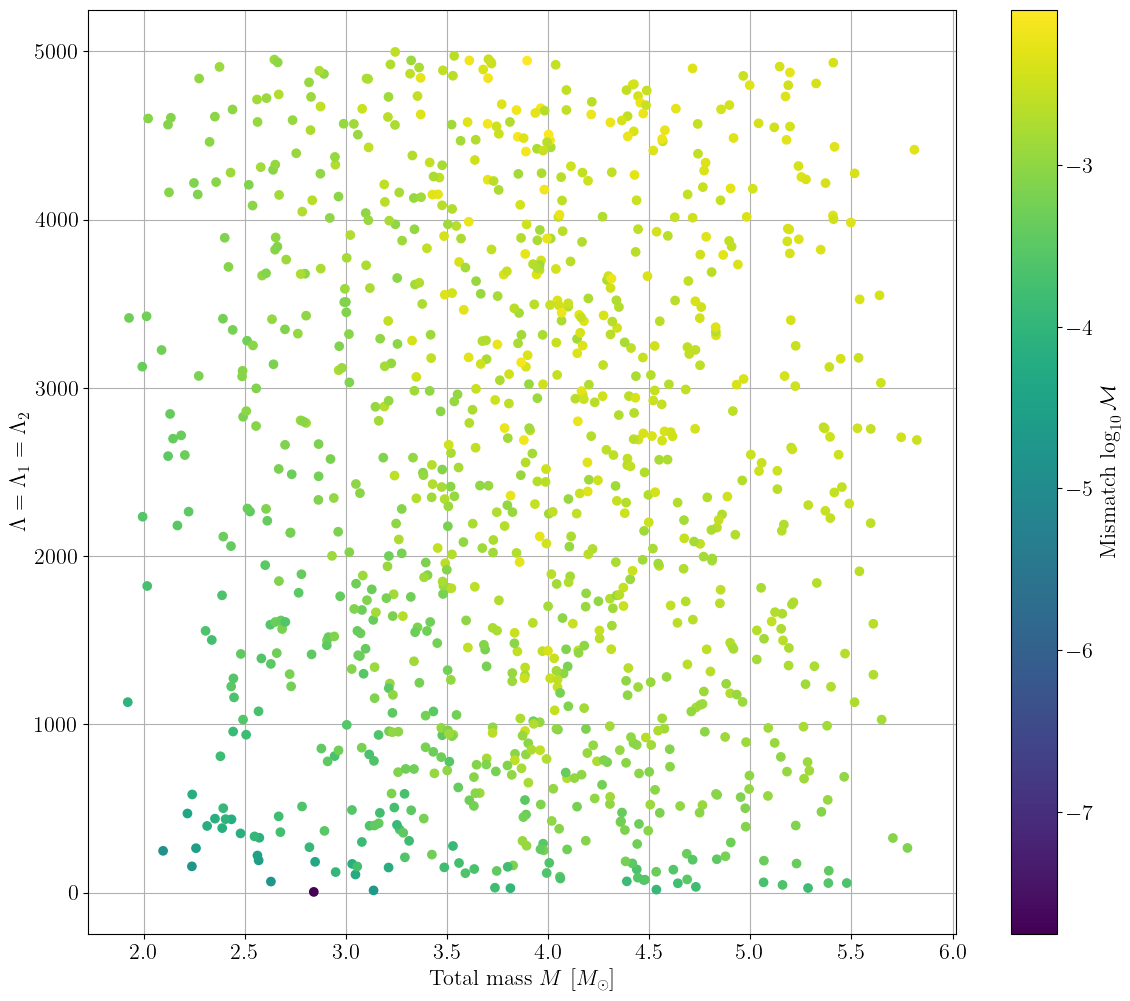

In [33]:
# Plot them
plt.figure(figsize = (14, 12))
plt.scatter(total_mass_values, lambda_values, c = mismatch_values, zorder=100)
plt.xlabel(r"Total mass $M$ [$M_{\odot}$]")
plt.ylabel(r"$\Lambda = \Lambda_1 = \Lambda_2$")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
plt.show()